# Quick Start With HuggingFace
- GitHub: https://github.com/haotian-liu/LLaVA?tab=readme-ov-file#fine-tuning-with-local-gpus
- HuggingFace: https://huggingface.co/docs/transformers/model_doc/llava

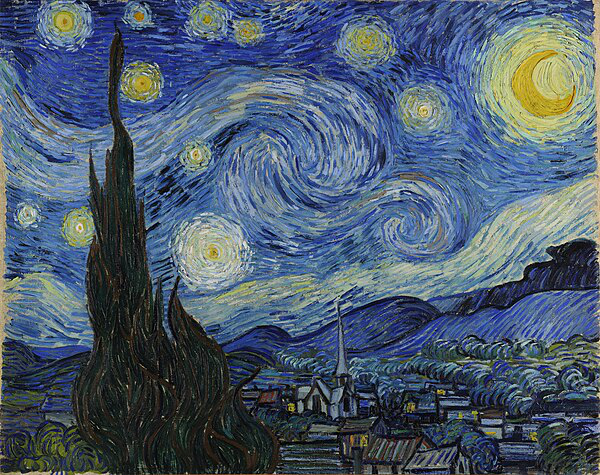

In [7]:
import requests
from PIL import Image

# 이 이미지 가져오는 코드 가끔 에러남 -> UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x782ed57e3650>
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/600px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
image

In [8]:
import torch
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [9]:
import transformers
print(transformers.__version__)

4.33.3


In [12]:
from transformers import pipeline

model_id = "llava-hf/llava-1.5-13b-hf"

pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})


===================================BUG REPORT===================================
The following directories listed in your path were found to be non-existent: {WindowsPath('C')}
The following directories listed in your path were found to be non-existent: {WindowsPath('vs/workbench/api/node/extensionHostProcess')}
The following directories listed in your path were found to be non-existent: {WindowsPath('/matplotlib_inline.backend_inline'), WindowsPath('module')}
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
The following directories listed in your path were found to be non-existent: {WindowsPath('/usr/local/cuda/lib64')}
DEBUG: Possible options found for libcudart.so: set()
CUDA SETUP: PyTorch settings found: CUDA_VERSION=118, Highest Compute Capability: 7.5.
CUDA SETUP: To manually override the PyTorch CUDA version please see:https://github.com/TimDettmers/bitsandbytes/blob/main/how_to_use_nonpytorch_cuda.md
CUDA SETUP: Loading bina

RuntimeError: Failed to import transformers.pipelines because of the following error (look up to see its traceback):

        CUDA Setup failed despite GPU being available. Please run the following command to get more information:

        python -m bitsandbytes

        Inspect the output of the command and see if you can locate CUDA libraries. You might need to add them
        to your LD_LIBRARY_PATH. If you suspect a bug, please take the information from python -m bitsandbytes
        and open an issue at: https://github.com/TimDettmers/bitsandbytes/issues

## 단어만 뽑은 버전

In [ ]:
prompt = "USER: <image>\nWhat are the main objects in this picture? Just pick 3 WORDs\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 500})

In [ ]:
print(outputs[0]["generated_text"])

USER:  
What are the main objects in this picture? Just pick 3 WORDs
ASSISTANT: Starry night, mountain, city


## 단어 + 간략한 설명

In [ ]:
prompt = "USER: <image>\nWhat are the main objects in this picture? Pick 3 keywords that impress you and number each word and reason you choose them. \nASSISTANT:\n"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 500})

In [ ]:
print(outputs[0]["generated_text"])

USER:  
What are the main objects in this picture? Pick 3 keywords that impress you and number each word and reason you choose them. 
ASSISTANT:
1. Starry night sky (1) - The night sky is filled with stars, creating a captivating and serene atmosphere.
2. Mountain range (2) - The mountain range in the background adds depth and beauty to the scene, providing a sense of scale and grandeur.
3. Town (3) - The town in the foreground adds a sense of human presence and contrasts with the vastness of the night sky and mountain range.


# 문제점 (1): 위키피디아에서 이미지를 불러올 때 가끔 발생하는 오류

In [ ]:
import requests
from PIL import Image

image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Meisje_met_de_parel.jpg/600px-Meisje_met_de_parel.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
image

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x782db402ff60>

# 다른 그림으로 진행 (1) 다른 유명한 명작: 진주 귀고리를 한 소녀 (요하네스 페르메이르)

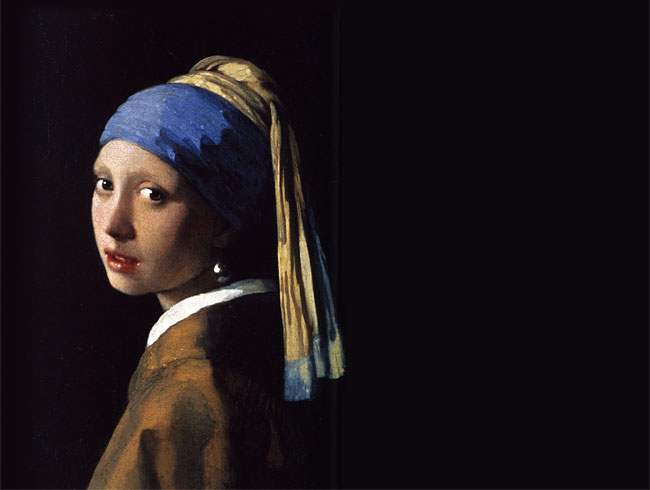

In [130]:
import requests
from PIL import Image

image_url = "https://www.newsearth.kr/news/photo/202005/290_530_396.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
image

In [ ]:
prompt = "USER: <image>\nWhat are the main objects in this picture? Pick 3 keywords that impress you and number each word and reason you choose them. \nASSISTANT:\n"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 500})

In [ ]:
print(outputs[0]["generated_text"])

USER:  
What are the main objects in this picture? Pick 3 keywords that impress you and number each word and reason you choose them. 
ASSISTANT:
1. Woman: The main subject of the image is a woman, who is wearing a blue headscarf and a brown dress.
2. Painting: The image is a painting, which is a form of artwork created using various techniques and materials.
3. Scarf: The woman is wearing a scarf, which is a piece of clothing that is typically worn around the neck and shoulders.


# 문제점 (2)

이 작품에서는 '진주' 혹은 '귀걸이'를 뽑아야함.  
3번째로 뽑은 '스카프'에서도 머리에 맸는데, 목과 어깨에 맸다고 설명함... -> 작품에 기본적인 설명을 주고, 그 설명에서 뽑아야하려나

# 다른 그림으로 진행 (2) 신인 작가의 정보가 많이 없는 작품: 휴가 (송지호)

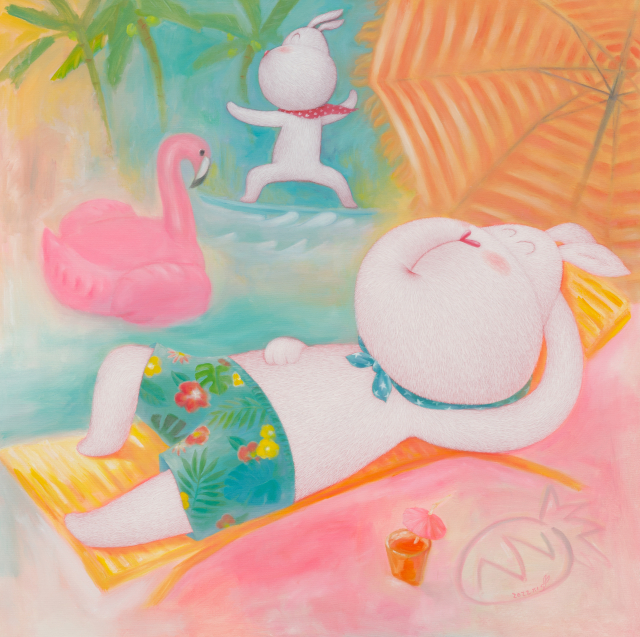

In [122]:
import requests
from PIL import Image

image_url = "https://www.artmusee.com/_images/artwork/640/test_20240116_H9G1K0EF8YJ0I580.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
image

In [ ]:
prompt = "USER: <image>\nWhat are the main objects in this picture? Pick 3 keywords that impress you and number each word and reason you choose them. \nASSISTANT:\n"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 500})

In [ ]:
print(outputs[0]["generated_text"])

USER:  
What are the main objects in this picture? Pick 3 keywords that impress you and number each word and reason you choose them. 
ASSISTANT:
1. Pink flamingo - The flamingo is a prominent and colorful object in the picture, adding a vibrant touch to the scene.
2. White rabbit - The rabbit is the main subject of the image, lying on a beach chair and enjoying a relaxing moment.
3. Pink beach - The beach is painted in a pink hue, creating a unique and eye-catching backdrop for the scene.


# 다른 그림으로 진행 (3) 신인 작가의 정보가 많이 없는 작품: Pollen, 녹청자를 품다 (이성미)

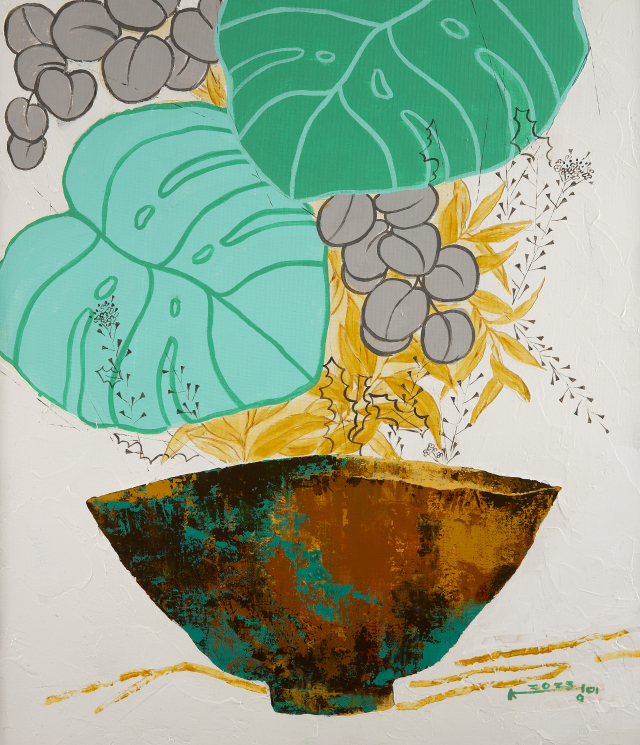

In [150]:
image_url = "https://www.artmusee.com/_images/artwork/640/test_20240117_5M24GL78ZQ0804UU.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
image

In [151]:
prompt = "USER: <image>\nWhat are the main objects in this picture? Pick 3 keywords that impress you and number each word and reason you choose them. \nASSISTANT:\n"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 500})

In [152]:
print(outputs[0]["generated_text"])

USER:  
What are the main objects in this picture? Pick 3 keywords that impress you and number each word and reason you choose them. 
ASSISTANT:
1. Bowl: The bowl is the central object in the picture, and it is filled with various fruits and vegetables. It is a large, brown bowl that stands out against the white background.
2. Grapes: The grapes are a prominent feature in the image, with several bunches of grapes scattered throughout the scene. They add a pop of color and a sense of abundance to the picture.
3. Leaves: The leaves are another key element in the picture, with several large leaves surrounding the bowl and the grapes. They provide a natural and organic touch to the composition, creating a sense of freshness and vitality.


## 도언 research

In [153]:
prompt = "USER: <image>\nWhat are the main objects in this picture? Just pick 3 WORDs\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 500})

In [154]:
print(outputs[0]["generated_text"])

USER:  
What are the main objects in this picture? Just pick 3 WORDs
ASSISTANT: Bowl, Grapes, Leaves


#### Keyword 정제

In [155]:
import re
keywords = outputs[0]["generated_text"].split('ASSISTANT: ')[1].split(', ')

print(keywords)

['Bowl', 'Grapes', 'Leaves']


#### 좌표 출력 prompt

In [156]:
# prompt_for_coord =  "USER: <image>\nTell me the coordinate of {}, Sentence like (x1, y1, x2, y2)\nASSISTANT:".format(", ".join(keywords))
prompt_for_coord =  "USER: <image>\nTell me the each one coordinate of {}, Sentence like keyword :(x1, y1, x2, y2)\nASSISTANT:".format(", ".join(keywords))
outputs_coord = pipe(image, prompt=prompt_for_coord, generate_kwargs={"max_new_tokens": 500})

In [157]:
print(outputs_coord[0]["generated_text"])

USER:  
Tell me the each one coordinate of Bowl, Grapes, Leaves, Sentence like keyword :(x1, y1, x2, y2)
ASSISTANT: The coordinates of the elements in the image are as follows:

Bowl: (0.16, 0.62, 0.84, 0.99)
Grapes: (0.49, 0.22, 0.76, 0.51)
Leaves: (0.0, 0.0, 0.99, 0.39)

The bowl is located at (0.16, 0.62, 0.84, 0.99), the grapes are at (0.49, 0.22, 0.76, 0.51), and the leaves are spread across the entire image.


#### 좌표 정제

In [142]:
output_string = outputs_coord[0]["generated_text"]
# 패턴 설정
pattern = r"(\w+): \(([0-9\.]+), ([0-9\.]+), ([0-9\.]+), ([0-9\.]+)\)"

# 패턴에 맞는 문자열 찾기
matches = re.findall(pattern, output_string)
dic = {}
# 결과 출력
for match in matches:
    object_name = match[0]
    coordinates = tuple(map(float, match[1:]))
    dic[object_name] = coordinates
print(dic)

{}


In [102]:
# coords  = [c[1:-1].split(", ") for c in outputs_coord[0]["generated_text"].split('ASSISTANT: ')[1].split("\n")]
# coords = [[float(x) for x in sublist] for sublist in coords]
# print(coords)

[[0.0, 0.0, 0.25, 0.25], [0.12, 0.0, 0.36, 0.25], [0.12, 0.12, 0.44, 0.45], [0.12, 0.25, 0.44, 0.55], [0.12, 0.5, 0.44, 0.75], [0.12, 0.75, 0.72, 0.99]]


#### 박스 그리기

In [96]:
# from PIL import Image, ImageDraw

# img = image
# img.show()

# draw = ImageDraw.Draw(img)
# draw.rectangle((coords[0],coords[1],coords[2],coords[3]), outline=(0,255,0), width = 3)
# # draw.rectangle((100,100,300,300), outline=(0,255,255), width = 3)

# img.show()
# img

[[0.0, 0.1, 0.44, 0.99]]
[[0.0, 49.0, 286.0, 485.1]]


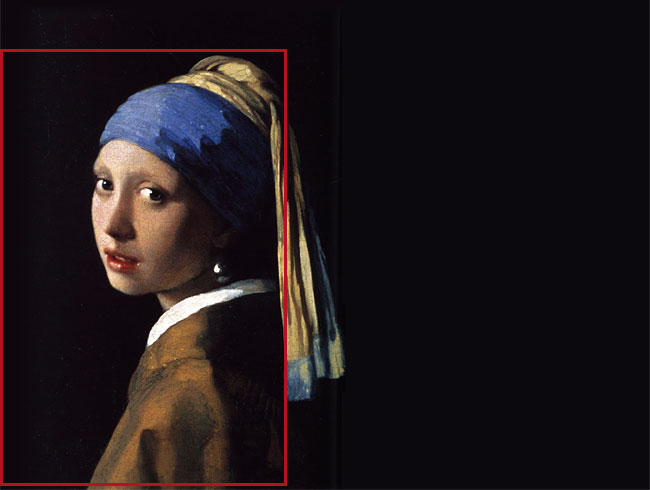

In [141]:
from PIL import Image, ImageDraw
import copy
import random
#################################################################
coords = [[0.0, 0.1, 0.44, 0.99]]
# coords = [v for k,v in dic.items()]
#################################################################
# 이미지 로드
img = copy.deepcopy(image)
width, height = img.size  # 이미지의 너비와 높이
print(coords)

# coords = [c*width if i%2==0 else c*height for i, c in enumerate(coords)]
coords = [[c*width if i%2==0 else c*height for i, c in enumerate(sublist)] for sublist in coords]
print(coords)


# 박스 그리기
draw = ImageDraw.Draw(img)
for c in coords:
  colors = [random.randint(0, 255) for _ in range(3)]
  draw.rectangle(c, outline=(colors[0],colors[1],colors[2]), width=3)

# 이미지 보기
img.show()
img